In [29]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
# Plotting Predicted vs Actual values
def plot_predicted_vs_actual(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def plot_predicted_vs_actual_with_jitter(y_true, y_pred, jitter_amount=0.02):
    # Adding jitter: add normally distributed noise to both y_true and y_pred
    jitter_y_true = y_true + np.random.normal(0, jitter_amount, y_true.shape)
    jitter_y_pred = y_pred + np.random.normal(0, jitter_amount, y_pred.shape)

    plt.figure(figsize=(10, 6))
    plt.scatter(jitter_y_true, jitter_y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values with Jitter')
    plt.grid(True)
    plt.show()

# models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Data preprocessing
from sklearn.preprocessing import StandardScaler


# Model evaluation and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

def custom_accuracy_within_one_class(y_true, y_pred):
    correct = np.sum(np.abs(y_true - y_pred) <= 1)
    total = len(y_true)
    return correct / total


def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a simple confusion matrix with minimal configuration.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()  # Adds a colorbar to show the scale
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_histograms(y_true, y_pred):
    """
    Plots a confusion matrix with histograms for true and predicted label distributions.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    
    # Create the main figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Positioning of the main confusion matrix plot
    main_ax = plt.subplot2grid((num_classes+1, num_classes+1), (1, 0), colspan=num_classes, rowspan=num_classes)
    main_ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Plot the histograms for the rows (True Labels)
    for i in range(num_classes):
        ax_row_hist = plt.subplot2grid((num_classes+1, num_classes+1), (1+i, num_classes))
        ax_row_hist.barh([0], [np.sum(cm[i, :])], color="blue", align='center')
        ax_row_hist.set_xlim(0, np.max(np.sum(cm, axis=1)) * 1.1)  # slightly larger to accommodate all bars
        ax_row_hist.set_yticks([])
        ax_row_hist.set_xticks([])

    # Plot the histograms for the columns (Predicted Labels)
    for j in range(num_classes):
        ax_col_hist = plt.subplot2grid((num_classes+1, num_classes+1), (num_classes, j))
        ax_col_hist.bar([0], [np.sum(cm[:, j])], color="blue", align='center')
        ax_col_hist.set_ylim(0, np.max(np.sum(cm, axis=0)) * 1.1)  # slightly larger to accommodate all bars
        ax_col_hist.set_xticks([])
        ax_col_hist.set_yticks([])

    # Labeling and showing the plot
    main_ax.set_title('Confusion Matrix with Histograms')
    main_ax.set_xlabel('Predicted label')
    main_ax.set_ylabel('True label')
    plt.tight_layout()
    plt.show()


def classify_linear_probability(data):
    # Calculate mean and standard deviation
    mean = data.mean()
    std = data.std()
    
    # Define cutoffs based on your specification
    cutoffs = [
        mean - 2 * std,
        mean - 1.5 * std,
        mean - std,
        mean - (1/3) * std,
        mean + (1/3) * std,
        mean + std,
        mean + 1.5 * std,
        mean + 2 * std
    ]
    
    # Use pandas.cut to categorize the data
    categories = pd.cut(data, bins=[-np.inf] + cutoffs + [np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])    


    return categories.codes

def get_model_performance(y,y_pred, plot = False):

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r_2 = r2_score(y, y_pred)
    within_1 = custom_accuracy_within_one_class(y, y_pred)

    # print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R²):", r_2)
    print("Within 1:", within_1)

    if plot:
        try:
            plot_confusion_matrix_with_histograms(y, y_pred)
        except ValueError:
            plot_predicted_vs_actual(y,y_pred)

    return rmse, r_2, within_1
    

enable %%R cells in the notebook (mostly for vizualisation)

In [30]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [31]:
# Initialize dictionaries for model metrics
performance_train = {}
performance_test = {}

In [74]:
from rural_beauty.config import predictors_DE, data_dir


predictors_full = pd.read_csv(predictors_DE, sep=",",  index_col=False, na_values = -99)


In [75]:
predictors_full.columns

Index(['dem_1', 'dem_2', 'dem_3', 'seemee_1', 'wald_1', 'natgru_2', 'heide_1',
       'sgall', 'natgru_1_2', 'wein_1', 'acker_1_2', 'stoer_1_2', 'stra_1',
       'leit_1', 'dem_1_2', 'dem_3_4', 'obst_1_4', 'wald_1_4', 'acker_1_4',
       'stoer_1', 'stoer_2', 'stoer_3', 'noveg_2', 'spfr_1', 'weanl_1_4',
       'stra_1_2', 'hemero_1', 'code_offen_1', 'code_abbau_1', 'code_salzw_1',
       'code_landwi_1', 'code_hafen_1', 'code_bebau_1', 'code_kraut_1',
       'code_feucht_1', 'code_spfr_1', 'code_stoer_1', 'code_natur_1',
       'code_strbah_1', 'code_stgrue_1', 'code_weide_1', 'code_stadt_1',
       'code_sand_1', 'code_nwald_1', 'code_acker_1', 'code_suempf_1',
       'code_gewage_1', 'code_selten_1', 'code_wanat_1', 'code_gezei_1',
       'code_flug_1', 'code_fels_1', 'code_obswei_1', 'code_gwlf_1',
       'code_lwald_1', 'code_siedl_1', 'code_seemee_1', 'code_schatt_1',
       'code_natgru_1', 'code_seen_1', 'code_noveg_1', 'code_wein_1',
       'code_wald_1', 'code_geholz_1', 'code

In [72]:
features_beauty = set(
  'dem_1_2'  ,
  'dem_3_4'  ,
  'obst_1_4' ,
  'wald_1_4' ,
  'natgru_2' ,
  'acker_1_4',
  'stoer_1'  ,
  'stoer_2'  ,
  'stoer_3'  ,
  'noveg_2'  ,
  'seemee_1' ,
  'spfr_1'   ,
  'heide_1'  ,
  'weanl_1_4',
  'stra_1_2' ,
  'leit_1'   ,
  'hemero_1' )


for column_name in predictors_full.columns:
    if column_name not in features_beauty:
        predictors = predictors.drop(column_name, axis = 1)

In [ ]:
predictors = predictors.drop('hemero_1', axis = 1)

predictors.tail(5)

Now the left hand side

In [33]:
from rural_beauty.config import outcome_DE
outcome = pd.read_csv(outcome_DE, sep=",",  index_col=False, na_values = -99)
outcome = outcome['schoen'].to_frame()
outcome.tail(5)

,schoen
4995,5.0
4996,4.0
4997,6.0
4998,5.0
4999,4.0


Split the Dataset

In [34]:
X    = predictors
Y    = outcome
feat = predictors.columns.values
print(X.shape)
print(Y.shape)

(5000, 73)
(5000, 1)


In [35]:
# Find rows with NaN values in X
na_rows_X = X.apply(lambda x: np.any(pd.isna(x)), axis=1)
resultx = np.where(na_rows_X)[0]

# Find rows with NaN values in Y
na_rows_Y = Y.apply(lambda x: np.any(pd.isna(x)), axis=1)
resulty = np.where(na_rows_Y)[0]

# Combine the results
result = list(set(resulty).union(set(resultx)))

print('NA rows: ' + str(result))

NA rows: [np.int64(2500), np.int64(3621), np.int64(1511), np.int64(553), np.int64(1585), np.int64(4594), np.int64(3219), np.int64(501), np.int64(4696)]


In [36]:
X = X.drop(X.index[result])
Y = Y.drop(Y.index[result])

print(X.shape)
print(Y.shape)

(4991, 73)
(4991, 1)


Create 4 dataset for training and testing the algorithm 

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2024, stratify = Y)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

In [38]:
# Normalizing the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
Y_train = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test = scaler_Y.transform(Y_test.values.reshape(-1, 1)).ravel()

In [39]:
rfCla = RandomForestClassifier(max_depth=10,min_samples_split= 20, oob_score = True) 
rfCla.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20, oob_score=True)

In [40]:
# Make predictions
y_pred_train = rfCla.predict(X_train)
y_pred_test = rfCla.predict(X_test)

print("Random Forest Classification: Training Set Performance")
performance_train['RFC'] = get_model_performance(y_train, y_pred_train)

print("---------------------------------------------")

print("Random Forest Classification: Test Set Performance")
performance_test['RFC'] = get_model_performance(y_train, y_pred_train)

Random Forest Classification: Training Set Performance
Root Mean Squared Error (RMSE): 0.4699379569333951
R-squared (R²): 0.8986537542589905
Within 1: 0.9811623246492986
---------------------------------------------
Random Forest Classification: Test Set Performance
Root Mean Squared Error (RMSE): 0.4699379569333951
R-squared (R²): 0.8986537542589905
Within 1: 0.9811623246492986


In [41]:
# now a linear regression 

In [42]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Retrieve the estimated coefficients
coefficients = pd.DataFrame({
    'Feature': predictors.columns,
    'Coefficient': linReg.coef_
})

coefficients = coefficients.sort_values(by = 'Coefficient', key = lambda x: abs(x), ascending = False) 

# If you also need the intercept:
intercept = linReg.intercept_

print("Intercept:", intercept)
print(coefficients.round(4))


Intercept: 4.91942356031859
          Feature   Coefficient
1           dem_2 -5.173419e+11
62  code_geholz_1 -2.312094e+11
29  code_landwi_1 -1.985223e+11
43   code_acker_1  1.953424e+11
4          wald_1  1.748738e+11
..            ...           ...
12         stra_1 -2.210000e-02
10      acker_1_2  1.940000e-02
5        natgru_2 -1.930000e-02
38  code_stgrue_1 -1.100000e-02
48   code_gezei_1  0.000000e+00

[73 rows x 2 columns]


In [43]:
# Make predictions
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

print("Linear Probability: Training Set Performance")
performance_train['LMR'] = get_model_performance(y_train, y_pred_train)
print("---------------------------------------------")
print("Linear Probability: Test Set Performance")
performance_test['LMR'] = get_model_performance(y_test, y_pred_test)

Linear Probability: Training Set Performance
Root Mean Squared Error (RMSE): 0.49015514915123126
R-squared (R²): 0.8897461521797886
Within 1: 0.9587174348697395
---------------------------------------------
Linear Probability: Test Set Performance
Root Mean Squared Error (RMSE): 29596272876.533134
R-squared (R²): -4.040556848101894e+20
Within 1: 0.9591346153846154


In [44]:
# now classify them like they did in the paper


In [45]:
y_pred_train = linReg.predict(X_train)
y_pred_test = linReg.predict(X_test)

y_pred_train_class = classify_linear_probability(y_pred_train)
y_pred_test_class = classify_linear_probability(y_pred_test)

print("Linear Probability Sigma Binning: Training Set Performance")
performance_train['LMC'] = get_model_performance(y_train, y_pred_train_class)
print("---------------------------------------------")
print("Linear Probability Sigma Binning: Test Set Performance")
performance_test['LMC'] = get_model_performance(y_test, y_pred_test_class)

Linear Probability Sigma Binning: Training Set Performance
Root Mean Squared Error (RMSE): 1.0591712266554212
R-squared (R²): 0.48517578615410994
Within 1: 0.9074148296593186
---------------------------------------------
Linear Probability Sigma Binning: Test Set Performance
Root Mean Squared Error (RMSE): 1.74127863423729
R-squared (R²): -0.398632829680053
Within 1: 0.6714743589743589


In [46]:
print("Training Set Performance:")
for model, metrics in performance_train.items():
    rmse, r_squared, within_1 = metrics
    print(f"Model: {model}")
    print(f"RMSE: {rmse:.2f}, R^2: {100*r_squared:.2f}%, Within 1 Class: {100*within_1:.2f}%")

print("Testing Set Performance:")
for model, metrics in performance_test.items():
    rmse, r_squared, within_1 = metrics
    print(f"Model: {model}")
    print(f"RMSE: {rmse:.2f}, R^2: {100*r_squared:.2f}%, Within 1 Class: {100*within_1:.2f}%")

Training Set Performance:
Model: RFC
RMSE: 0.47, R^2: 89.87%, Within 1 Class: 98.12%
Model: LMR
RMSE: 0.49, R^2: 88.97%, Within 1 Class: 95.87%
Model: LMC
RMSE: 1.06, R^2: 48.52%, Within 1 Class: 90.74%
Testing Set Performance:
Model: RFC
RMSE: 0.47, R^2: 89.87%, Within 1 Class: 98.12%
Model: LMR
RMSE: 29596272876.53, R^2: -40405568481018937081856.00%, Within 1 Class: 95.91%
Model: LMC
RMSE: 1.74, R^2: -39.86%, Within 1 Class: 67.15%


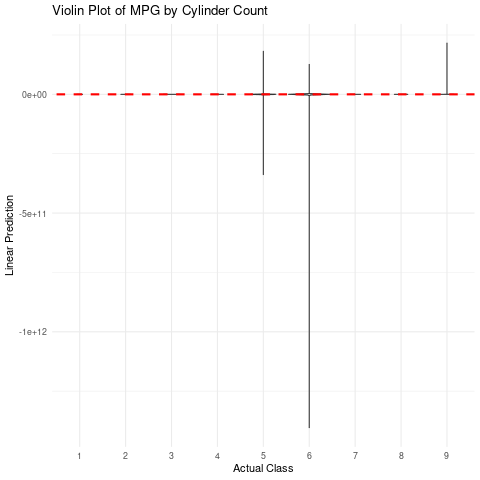

In [47]:
%%R -i y_test,y_pred_test,y_pred_test_class

d <- data.frame(y_test, y_pred_test, y_pred_test_class)

library(ggplot2)
ggplot(d, aes(factor(y_test), y_pred_test)) +
  geom_violin(trim=FALSE) +
  labs(title="Violin Plot of MPG by Cylinder Count",
       x="Actual Class",
       y="Linear Prediction") +
  geom_abline(slope=1, intercept=0, color="red", linetype="dashed", size=1) +
  theme_minimal()


In [48]:
from matplotlib.colors import ListedColormap

def plot_predicted_vs_actual_colored(y_true, y_pred, categories):
    # Create a colormap from green to blue
    cmap = ListedColormap(np.linspace([0, 1, 0], [0, 0, 1], 9))  # Ramping from green to blue

    plt.figure(figsize=(10, 6))
    
    # Scatter plot with colors based on 'categories'
    scatter = plt.scatter(y_true, y_pred, c=categories, cmap=cmap, edgecolor='k', alpha=0.7)
    
    # Adding a colorbar
    plt.colorbar(scatter, label='Category')
    
    # Plot the line of perfect prediction
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()

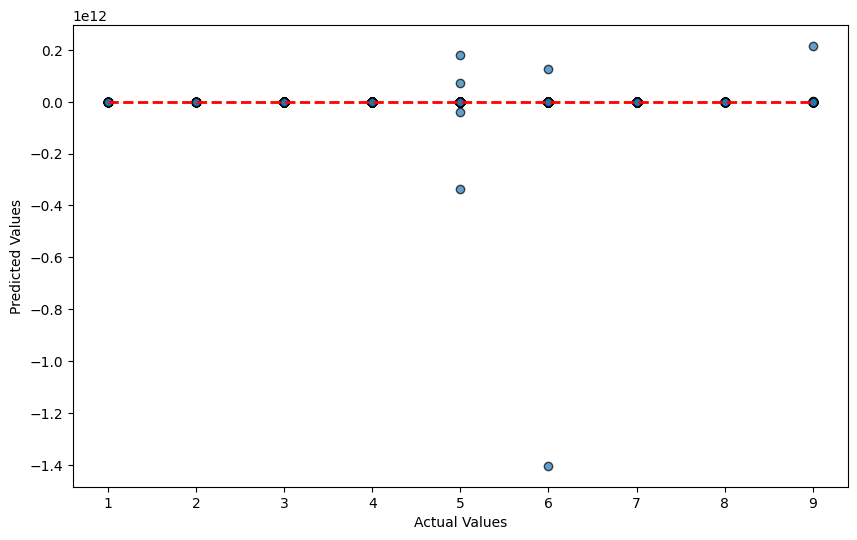

In [49]:
plot_predicted_vs_actual(y_test,y_pred_test)

In [65]:
X_train[np.argmin(y_pred_test),:]




array([-0.57458272,  0.        , -0.58112163, -0.13815516, -0.85025635,
       -0.13592641, -0.06396003, -0.52994829, -0.13384086, -0.07915762,
        1.38133277, -0.32288605,  0.82227487, -0.29639271, -0.51140993,
       -0.62658602, -0.24030864, -0.93082078,  1.20284749, -0.22453913,
       -0.32675388, -0.50945053, -0.04452304, -0.12080138,  1.99840704,
       -0.20875334, -0.02985603, -0.08519817,  0.        ,  1.18074493,
       -0.02002404, -0.46289177, -0.19531265, -0.08378112, -0.12080138,
       -0.22453913, -0.20639097, -0.06622656, -0.05684751, -0.37658646,
       -0.07968935,  0.        , -0.56897691,  1.47312543, -0.06926364,
       -0.15607629, -0.10645627, -0.87832934,  0.        , -0.04811672,
       -0.02661231, -0.12802164, -0.08180482, -0.49742704, -0.44152328,
       -0.13815516, -1.12532519, -0.11120242, -0.12834364, -0.0274755 ,
       -0.07915762, -0.85025635, -0.87541379, -0.15666925, -0.05766223,
       -0.44569431, -0.20072977, -0.15607629, -0.10971224, -0.06

In [64]:
X_train[np.argmin(y_pred_test)-1,:]

array([ 6.69940252e+00,  0.00000000e+00,  8.85534838e+00, -1.38155165e-01,
        1.65902445e+00,  4.99546005e+00, -6.39600250e-02,  2.09628882e+00,
        4.35558681e+00, -7.91576153e-02, -1.28824300e+00, -3.22886049e-01,
       -6.15852575e-01, -2.96392708e-01,  9.67278162e+00,  8.52140591e+00,
       -2.40308637e-01,  1.93465824e+00, -1.75384911e+00, -2.24539126e-01,
       -3.26753881e-01, -5.09450535e-01,  2.89321576e+01, -1.20801378e-01,
       -7.18599838e-01, -1.00859357e+00,  4.78497388e+00, -8.51981669e-02,
        0.00000000e+00, -1.52512286e+00, -2.00240433e-02, -4.62891773e-01,
       -1.95312650e-01, -8.37811237e-02, -1.20801378e-01, -2.24539126e-01,
        1.05906979e+00, -6.62265557e-02, -5.68475073e-02, -7.17272730e-01,
       -7.96893454e-02,  0.00000000e+00,  1.97095685e-01, -1.04967602e+00,
       -6.92636380e-02, -1.56076292e-01,  1.73709970e+00,  1.87909661e+00,
        0.00000000e+00, -4.81167204e-02, -2.66123136e-02, -1.28021640e-01,
       -8.18048244e-02, -